# Tutorial 2: Trends

The basic NeuralProphet model showcased in tutorial 1 comprised of five components, where we will be dig deeper in how to configure the components in tutorial 2-6.

The most classic consideration in modelling a time-series forecast would be trend. Within the trend module, time interval is broken into subsegments where different linear equations are used in each subsegments to describe the relationship between time and value.

Based on the same sample we demonstrated in tutorial 1, you can see how the trend is configured with the following code:

In [2]:
# Import the NeuralProphet class and dataset
# Navigate to tutorial 1 if necessary
from neuralprophet import NeuralProphet
import pandas as pd

df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

Configuring the trend component in the model
- **n_changepoints:** *int, default:0.8*
  <br>number of potential trend changepoints
- **trend_reg:** *float, default:0*
  <br>the smaller the float is the higher flexibility the model
    has in automatic changepoint selection, vice versa
- **trend_reg_threshold:** *float, default=None*
  <br>the smaller the float, the better the model fit seasonal flutuation

In [54]:
# Manual tuning parameters for the trend component
m = NeuralProphet(
    n_changepoints=10,  
    trend_reg=2,    
    trend_reg_threshold=3
    )


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.


After training the model with your desired parameter setting, you can plot a graph to assess how well the model fit the dataset and further fine tune the hyperparameters by comparing the actual versus predicted value.

In [ ]:
# Graph plotting
# Navigate to tutorial 1 if necessary

metrics = m.fit(df)
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.21E-02, min: 1.07E+00


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.62E-01, min: 9.14E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.07E-01
Epoch[173/173]: 100%|█| 173/173 [00:09<00:00, 17.83it/s, SmoothL1Loss=0.00581, MAE=4.75, RMSE=6.39, Loss=0.0302, Reg
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


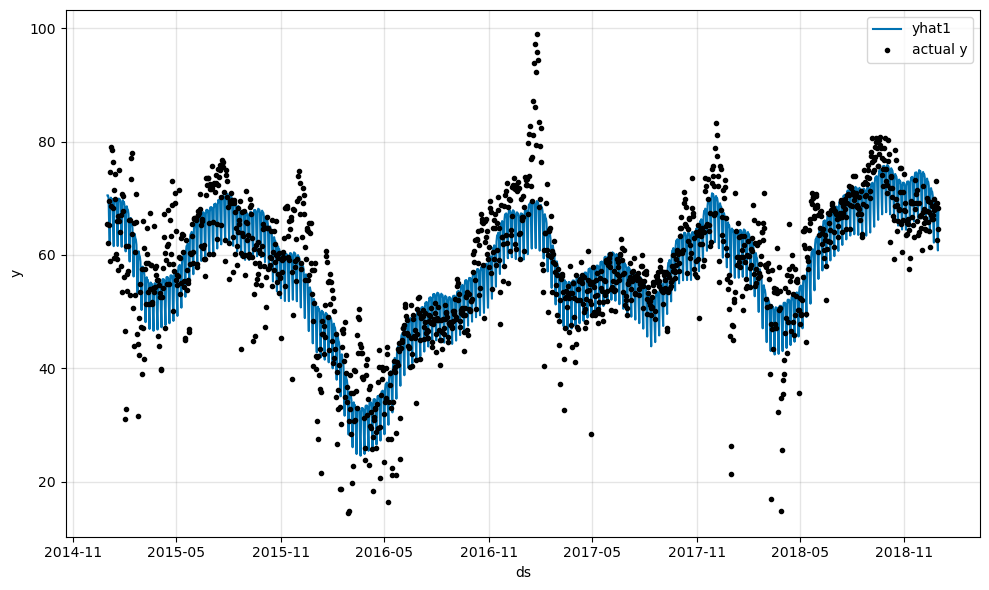

In [55]:
# Model fitting, forecasting and prediction plotting 
# Navigate to tutorial 1 if necessary

metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

In [51]:
from neuralprophet.plot_model_parameters import plot_trend, plot_trend_change

figsize = (10, 3)

plt = plot_trend(m, figsize=figsize)
plt = plot_trend_change(m, figsize=figsize)

TypeError: plot_trend() missing 1 required positional argument: 'quantile'

Trend features we could cover:

- Changepoints and how are they set automatically
- Trend regularization
- Trend global and local
- Advanced users: discontinuous trend
